In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
df_rated = pd.read_csv('C:\\Users\\sheny\\Documents\\Jupyter\\Global AI\\SDG\\SDG_rating_MXUS\\SDG_Data_File_Daily.csv')

In [ ]:
df_rated

,Unnamed: 0,Timestamp,Ticker,ISIN,Company_Name,GICS Sector,SDG_1,SDG_2,SDG_3,SDG_4,...,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
0,0,2013-04-01,AOS,US8318652091,a. o. smith corp,Industrials,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-04-02,AOS,US8318652091,a. o. smith corp,Industrials,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2013-04-03,AOS,US8318652091,a. o. smith corp,Industrials,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2013-04-04,AOS,US8318652091,a. o. smith corp,Industrials,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2013-04-05,AOS,US8318652091,a. o. smith corp,Industrials,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638343,1638343,2020-06-12,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1638344,1638344,2020-06-13,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1638345,1638345,2020-06-14,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1638346,1638346,2020-06-15,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sdg_cols = ['SDG_' + str(i) for i in range(1, 18)]
sdg_cols.append('SDG_Mean')
sdg_std_cols = ['SDG_' + str(i) + '_std' for i in range(1, 18)]
sdg_std_cols.append('SDG_std_Mean')
sdg_count_cols = ['SDG_' + str(i) + '_count' for i in range(1, 18)]
sdg_count_cols.append('SDG_count_Mean')
ma7_cols = ['MA_7day_' + str(i) for i in range(1, 18)]
ma7_cols.append('MA_7day_Mean')
ma60_cols = ['MA_60day_' + str(i) for i in range(1, 18)]
ma60_cols.append('MA_60day_Mean')

new_cols = [sdg_cols, sdg_std_cols, sdg_count_cols, ma7_cols, ma60_cols]

In [ ]:
new_sdg_cols = ['SDG_'+i.split('_')[-1] for i in sdg_cols[:-1]]
new_sdg_cols.append('SDG_Mean')
new_sdg_std_cols = ['SDG_'+i.split('_')[-2] + '_STD' for i in sdg_std_cols[:-1]]
new_sdg_std_cols.append('SDG_STD_Mean')
sdg_news_vol_cols = ['SDG_'+i.split('_')[-2] + '_News_Volume' for i in sdg_count_cols[:-1]]
sdg_news_vol_cols.append('SDG_News_Volume_Mean')
sts_cols = ['STS_'+i.split('_')[-1] for i in ma7_cols]
lts_cols = ['LTS_'+i.split('_')[-1] for i in ma60_cols]

old_cols = [new_sdg_cols, new_sdg_std_cols, sdg_news_vol_cols, sts_cols, lts_cols]

In [ ]:
for old, new in zip(old_cols, new_cols):
    df_rated.rename(columns=dict(zip(old, new)), inplace=True)
df_rated.rename(columns={'Timestamp':'date', 'Company_Name':'COMPANY'}, inplace=True)
df_rated.columns

Index(['Unnamed: 0', 'date', 'Ticker', 'ISIN', 'COMPANY', 'GICS Sector',
       'SDG_1', 'SDG_2', 'SDG_3', 'SDG_4', 'SDG_5', 'SDG_6', 'SDG_7', 'SDG_8',
       'SDG_9', 'SDG_10', 'SDG_11', 'SDG_12', 'SDG_13', 'SDG_14', 'SDG_15',
       'SDG_16', 'SDG_17', 'SDG_Mean', 'MA_7day_1', 'MA_7day_2', 'MA_7day_3',
       'MA_7day_4', 'MA_7day_5', 'MA_7day_6', 'MA_7day_7', 'MA_7day_8',
       'MA_7day_9', 'MA_7day_10', 'MA_7day_11', 'MA_7day_12', 'MA_7day_13',
       'MA_7day_14', 'MA_7day_15', 'MA_7day_16', 'MA_7day_17', 'MA_7day_Mean',
       'MA_60day_1', 'MA_60day_2', 'MA_60day_3', 'MA_60day_4', 'MA_60day_5',
       'MA_60day_6', 'MA_60day_7', 'MA_60day_8', 'MA_60day_9', 'MA_60day_10',
       'MA_60day_11', 'MA_60day_12', 'MA_60day_13', 'MA_60day_14',
       'MA_60day_15', 'MA_60day_16', 'MA_60day_17', 'MA_60day_Mean',
       'SDG_1_std', 'SDG_2_std', 'SDG_3_std', 'SDG_4_std', 'SDG_5_std',
       'SDG_6_std', 'SDG_7_std', 'SDG_8_std', 'SDG_9_std', 'SDG_10_std',
       'SDG_11_std', 'SDG_12_st

(array([4.00000e+00, 4.30000e+01, 1.60000e+01, 4.60000e+01, 1.11000e+02,
        2.13000e+02, 5.02000e+02, 1.17700e+03, 1.47100e+03, 3.39500e+03,
        6.38800e+03, 1.37980e+04, 2.69920e+04, 5.43550e+04, 1.00148e+05,
        1.82674e+05, 2.86633e+05, 3.01079e+05, 1.84235e+05, 8.10000e+04,
        3.20010e+04, 1.39570e+04, 5.18400e+03, 2.35600e+03, 1.19600e+03,
        3.60000e+02, 1.28000e+02, 1.22000e+02, 5.10000e+01, 7.00000e+00,
        5.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00]),
 array([-8.26292056e+00, -7.77674763e+00, -7.29057470e+00, -6.80440177e+00,
        -6.31822883e+00, -5.83205590e+00, -5.34588297e+00, -4.85971004e+00,
        -4.37353711e+00, -3.88736418e+00, -3.40119124e+00, -2.91501831e+00,
        -2.42884538e+00, -1.94267245e+00, -1.45649952e+00, -9.70326584e-01,
        -4.84153652e-01,  2.01927953e-03,  4.88192211e-01,  9.74365143e-01,
         1.46053808e+00,  1.94671101e+00,  2.43288394e+00,  2.91905687e+00,
         3

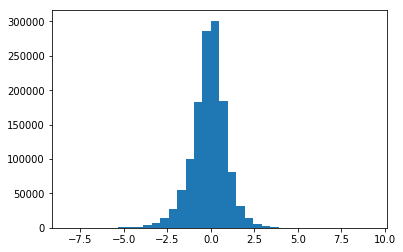

In [ ]:
plt.hist(df_rated.MA_7day_1.dropna(),bins = int(180/5))

In [ ]:
df_rated[['MA_7day_1', 'MA_7day_2', 'MA_7day_3',
       'MA_7day_4', 'MA_7day_5', 'MA_7day_6', 'MA_7day_7', 'MA_7day_8',
       'MA_7day_9', 'MA_7day_10', 'MA_7day_11', 'MA_7day_12', 'MA_7day_13',
       'MA_7day_14', 'MA_7day_15', 'MA_7day_16', 'MA_7day_17', 'MA_7day_Mean']].notnull().sum()

MA_7day_1       1299650
MA_7day_2       1335341
MA_7day_3       1479689
MA_7day_4       1454802
MA_7day_5       1089866
MA_7day_6       1265586
MA_7day_7       1369479
MA_7day_8       1518393
MA_7day_9       1464296
MA_7day_10      1485452
MA_7day_11      1515287
MA_7day_12      1386240
MA_7day_13      1274416
MA_7day_14      1248043
MA_7day_15      1288128
MA_7day_16      1505284
MA_7day_17      1252828
MA_7day_Mean    1535992
dtype: int64

In [ ]:
df_rated[['MA_7day_1', 'MA_7day_2', 'MA_7day_3',
       'MA_7day_4', 'MA_7day_5', 'MA_7day_6', 'MA_7day_7', 'MA_7day_8',
       'MA_7day_9', 'MA_7day_10', 'MA_7day_11', 'MA_7day_12', 'MA_7day_13',
       'MA_7day_14', 'MA_7day_15', 'MA_7day_16', 'MA_7day_17', 'MA_7day_Mean']].count()

MA_7day_1       1299650
MA_7day_2       1335341
MA_7day_3       1479689
MA_7day_4       1454802
MA_7day_5       1089866
MA_7day_6       1265586
MA_7day_7       1369479
MA_7day_8       1518393
MA_7day_9       1464296
MA_7day_10      1485452
MA_7day_11      1515287
MA_7day_12      1386240
MA_7day_13      1274416
MA_7day_14      1248043
MA_7day_15      1288128
MA_7day_16      1505284
MA_7day_17      1252828
MA_7day_Mean    1535992
dtype: int64

# Set quantile

criteria: 
* std is high
* news volume is low

In [ ]:
import itertools
a = [0.5,0.7,0.9] # count
b = [0.5,0.3,0.1] # standard deviation

# Quantile

In [ ]:
Quantile = pd.DataFrame(a, columns= ['Quantile'])
for k in range(1,18):
    Quantile['SDG_'+str(k)+'_count'] = df_rated['SDG_'+str(k)+'_count'].quantile([0.5,0.7,0.9]).values
Quantile

In [ ]:
Quantile.to_csv('Quantile_SDG_count.csv')

In [ ]:
Quantile = pd.DataFrame(b, columns= ['Quantile'])
for k in range(1,18):
    Quantile['SDG_'+str(k)+'_std'] = df_rated['SDG_'+str(k)+'_std'].quantile(b).values
Quantile

In [ ]:
Quantile.to_csv('Quantile_SDG_std.csv')

# Outlier(absolute SDG value)

# Scale =3 

In [ ]:
scale =3 
result = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for k in range(1,18):
    df = df_rated[abs(df_rated['MA_7day_'+str(k)]) > scale][['COMPANY','date','MA_7day_'+str(k),'SDG_'+str(k)+'_count','SDG_'+str(k)+'_std']]
    for i,j in itertools.product(a, b):
        df1 = df[(df['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile([i]).values[0]) & (df['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile([j]).values[0])]
        result.loc[(result['count'] == i) & (result['std'] == j),'ST_'+str(k)+'_number of outlier'] = df1[['MA_7day_'+str(k)]].count().values[0]
        
df = df_rated[abs(df_rated['MA_7day_Mean']) > scale][['COMPANY','date','MA_7day_Mean','SDG_count_Mean','SDG_std_Mean']]
for i,j in itertools.product(a, b):
    df1 = df[(df['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile([i]).values[0]) & (df['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile([j]).values[0])]
    result.loc[(result['count'] == i) & (result['std'] == j),'ST_Mean_number of outlier'] = df1[['MA_7day_Mean']].count().values[0]  
result

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_Mean_number of outlier
0,0.5,0.5,2777.0,1931.0,1935.0,2197.0,1883.0,1895.0,3336.0,2948.0,2955.0,2398.0,2125.0,2379.0,2815.0,2338.0,2945.0,2520.0,2012.0,2934.0
1,0.5,0.3,2050.0,1453.0,1120.0,1861.0,1883.0,1272.0,1490.0,1493.0,2098.0,1527.0,1193.0,1449.0,2015.0,1945.0,2104.0,1363.0,1579.0,1492.0
2,0.5,0.1,497.0,382.0,171.0,547.0,419.0,351.0,276.0,322.0,458.0,240.0,213.0,240.0,384.0,526.0,407.0,181.0,392.0,324.0
3,0.7,0.5,1791.0,1157.0,1334.0,1063.0,1232.0,1002.0,2533.0,1567.0,1781.0,1577.0,1296.0,1718.0,1827.0,1811.0,1955.0,1721.0,1124.0,2324.0
4,0.7,0.3,1193.0,763.0,660.0,818.0,1232.0,537.0,929.0,567.0,1101.0,888.0,568.0,912.0,1144.0,1460.0,1223.0,757.0,795.0,1040.0
5,0.7,0.1,148.0,93.0,45.0,125.0,173.0,80.0,104.0,49.0,99.0,50.0,22.0,76.0,79.0,324.0,101.0,37.0,96.0,110.0
6,0.9,0.5,744.0,530.0,622.0,392.0,389.0,388.0,1249.0,696.0,920.0,710.0,611.0,823.0,838.0,1025.0,876.0,770.0,361.0,1272.0
7,0.9,0.3,432.0,322.0,268.0,283.0,389.0,155.0,322.0,214.0,527.0,358.0,241.0,361.0,487.0,823.0,488.0,288.0,239.0,515.0
8,0.9,0.1,14.0,14.0,2.0,14.0,16.0,5.0,8.0,5.0,16.0,6.0,5.0,5.0,12.0,155.0,13.0,1.0,2.0,23.0


In [ ]:
result.to_csv('result_06.17/Outlier(absolute SDG value)_scale = 3.csv')

In [ ]:
#percentage
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for i in range(1,18):
    percentage['ST_'+ str(i) + '_outlier percentage(%)'] = result['ST_'+ str(i) + '_number of outlier']/total.loc['MA_7day_'+ str(i),'number']*100
percentage['ST_Mean_outlier percentage(%)'] = result['ST_Mean_number of outlier']/total.loc['MA_7day_Mean','number']*100
percentage
percentage.to_csv('result_06.17/overall/percentage(absolute SDG value)_scale = 3.csv')


In [ ]:
# percentage bins
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])

columns_lst = ['count', 'std']
columns_lst2 = ['ST_'+ str(i) + '_number of outlier' for i in range(1,19)]
columns_lst = columns_lst + columns_lst2
overall.columns = columns_lst 
result.columns = columns_lst 

tmp = result.iloc[:,2:].reset_index(drop =True)*100/ overall.iloc[:,2:].reset_index(drop =True)
percentage = pd.concat([percentage,tmp], axis = 1)
percentage.to_csv('result_06.17/bins/percentage(absolute SDG value)_scale = 3.csv')
percentage

NameError: name 'overall' is not defined

# Scale = 3.5

In [ ]:
scale =3.5
result = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for k in range(1,18):
    df = df_rated[abs(df_rated['MA_7day_'+str(k)]) > scale][['COMPANY','date','MA_7day_'+str(k),'SDG_'+str(k)+'_count','SDG_'+str(k)+'_std']]
    for i,j in itertools.product(a, b):
        df1 = df[(df['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile([i]).values[0]) & (df['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile([j]).values[0])]
        result.loc[(result['count'] == i) & (result['std'] == j),'ST_'+str(k)+'_number of outlier'] = df1[['MA_7day_'+str(k)]].count().values[0]

df = df_rated[abs(df_rated['MA_7day_Mean']) > scale][['COMPANY','date','MA_7day_Mean','SDG_count_Mean','SDG_std_Mean']]
for i,j in itertools.product(a, b):
    df1 = df[(df['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile([i]).values[0]) & (df['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile([j]).values[0])]
    result.loc[(result['count'] == i) & (result['std'] == j),'ST_Mean_number of outlier'] = df1[['MA_7day_Mean']].count().values[0]
result

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_Mean_number of outlier
0,0.5,0.5,1323.0,918.0,908.0,889.0,933.0,889.0,1730.0,1269.0,1421.0,1049.0,902.0,1124.0,1381.0,1084.0,1484.0,1171.0,922.0,1352.0
1,0.5,0.3,994.0,689.0,549.0,754.0,933.0,590.0,784.0,683.0,1005.0,709.0,537.0,714.0,991.0,912.0,1054.0,649.0,754.0,698.0
2,0.5,0.1,244.0,193.0,89.0,266.0,221.0,172.0,138.0,165.0,231.0,124.0,113.0,120.0,184.0,240.0,202.0,91.0,185.0,148.0
3,0.7,0.5,842.0,560.0,626.0,388.0,605.0,486.0,1355.0,641.0,849.0,661.0,557.0,806.0,921.0,851.0,1005.0,795.0,511.0,1092.0
4,0.7,0.3,565.0,366.0,324.0,293.0,605.0,251.0,521.0,245.0,511.0,399.0,263.0,447.0,584.0,694.0,629.0,353.0,385.0,500.0
5,0.7,0.1,69.0,47.0,25.0,51.0,85.0,37.0,49.0,23.0,50.0,18.0,12.0,38.0,36.0,152.0,49.0,17.0,39.0,57.0
6,0.9,0.5,393.0,279.0,280.0,140.0,187.0,220.0,698.0,331.0,456.0,290.0,268.0,417.0,454.0,488.0,494.0,351.0,153.0,653.0
7,0.9,0.3,234.0,167.0,121.0,93.0,187.0,84.0,196.0,108.0,255.0,156.0,109.0,193.0,264.0,398.0,273.0,123.0,106.0,268.0
8,0.9,0.1,5.0,6.0,0.0,5.0,7.0,4.0,4.0,2.0,10.0,2.0,3.0,1.0,6.0,83.0,5.0,0.0,2.0,11.0


In [ ]:
result.to_csv('result_06.17/Outlier(absolute SDG value)_scale = 3.5.csv')

In [ ]:
#percentage
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for i in range(1,18):
    percentage['ST_'+ str(i) + '_outlier percentage(%)'] = result['ST_'+ str(i) + '_number of outlier']/total.loc['MA_7day_'+ str(i),'number']*100
percentage['ST_Mean_outlier percentage(%)'] = result['ST_Mean_number of outlier']/total.loc['MA_7day_Mean','number']*100
percentage
percentage.to_csv('result_06.17/overall/percentage(absolute SDG value)_scale = 3.5.csv')

In [ ]:
# percentage bins
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])

columns_lst = ['count', 'std']
columns_lst2 = ['ST_'+ str(i) + '_number of outlier' for i in range(1,19)]
columns_lst = columns_lst + columns_lst2
overall.columns = columns_lst 
result.columns = columns_lst 

tmp = result.iloc[:,2:].reset_index(drop =True)*100/ overall.iloc[:,2:].reset_index(drop =True)
percentage = pd.concat([percentage,tmp], axis = 1)
percentage.to_csv('result_06.17/bins/percentage(absolute SDG value)_scale = 3.5.csv')
percentage

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_18_number of outlier
0,0.5,0.5,1.246831,0.799944,0.585036,0.692610,2.190347,0.773777,1.172404,0.561857,0.899134,0.717736,0.478400,0.912671,1.420621,1.392010,1.415855,0.679128,0.938652,0.471917
1,0.5,0.3,1.325864,0.854595,0.604492,0.807877,2.190347,0.910466,1.094437,0.638981,0.965659,0.797857,0.500499,0.992494,1.437732,1.541947,1.417772,0.680351,1.134841,0.410417
2,0.5,0.1,1.631780,1.215518,1.016446,1.964695,2.554028,1.415405,1.440802,1.455925,1.473590,1.227115,1.031398,1.130156,1.347689,2.013254,1.368564,1.028714,1.419038,0.328714
3,0.7,0.5,1.487317,0.945275,0.766359,0.605824,2.527890,0.772066,1.433953,0.564927,1.178741,0.858653,0.640171,1.090132,1.884823,1.891994,1.905936,0.889949,0.999922,0.757208
4,0.7,0.3,1.593614,1.012196,0.814684,0.715507,2.527890,0.844180,1.380937,0.626422,1.312039,1.019365,0.678395,1.219545,1.940651,2.204224,1.930336,0.886601,1.296558,0.700545
5,0.7,0.1,1.882160,1.277868,1.410835,1.721810,2.600979,1.247892,1.865956,1.279911,1.997603,0.800000,0.803751,1.319444,1.150160,3.725490,1.468385,1.143241,1.280788,0.499649
6,0.9,0.5,2.698249,1.843288,1.337793,1.018552,3.526306,1.078643,2.400853,1.082088,2.327837,1.427025,1.228287,2.123867,3.354267,4.352479,3.553190,1.578947,1.011169,1.975734
7,0.9,0.3,2.916978,2.189877,1.491801,1.255230,3.526306,1.092044,2.440543,1.574115,2.895753,1.908257,1.451978,2.689521,3.665648,5.635797,3.727471,1.710947,1.405463,2.229432
8,0.9,0.1,1.607717,1.690141,0.000000,1.779359,1.790281,1.302932,1.932367,1.709402,4.504505,1.290323,4.477612,0.529101,1.923077,11.857143,1.572327,0.000000,0.677966,1.255708


# Scale = 4

In [ ]:
scale = 4
result = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for k in range(1,18):
    df = df_rated[abs(df_rated['MA_7day_'+str(k)]) > scale][['COMPANY','date','MA_7day_'+str(k),'SDG_'+str(k)+'_count','SDG_'+str(k)+'_std']]
    for i,j in itertools.product(a, b):
        df1 = df[(df['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile([i]).values[0]) & (df['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile([j]).values[0])]
        result.loc[(result['count'] == i) & (result['std'] == j),'ST_'+str(k)+'_number of outlier'] = df1[['MA_7day_'+str(k)]].count().values[0]

df = df_rated[abs(df_rated['MA_7day_Mean']) > scale][['COMPANY','date','MA_7day_Mean','SDG_count_Mean','SDG_std_Mean']]
for i,j in itertools.product(a, b):
    df1 = df[(df['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile([i]).values[0]) & (df['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile([j]).values[0])]
    result.loc[(result['count'] == i) & (result['std'] == j),'ST_Mean_number of outlier'] = df1[['MA_7day_Mean']].count().values[0]
result

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_Mean_number of outlier
0,0.5,0.5,649.0,470.0,410.0,362.0,432.0,421.0,903.0,568.0,611.0,483.0,393.0,527.0,692.0,458.0,747.0,567.0,428.0,616.0
1,0.5,0.3,494.0,351.0,260.0,315.0,432.0,288.0,406.0,336.0,423.0,336.0,247.0,349.0,505.0,386.0,544.0,322.0,360.0,313.0
2,0.5,0.1,124.0,91.0,45.0,119.0,105.0,100.0,76.0,82.0,112.0,68.0,55.0,60.0,88.0,97.0,94.0,47.0,92.0,61.0
3,0.7,0.5,412.0,294.0,271.0,154.0,296.0,235.0,723.0,268.0,370.0,295.0,231.0,378.0,467.0,359.0,506.0,371.0,243.0,513.0
4,0.7,0.3,282.0,191.0,143.0,120.0,296.0,124.0,276.0,114.0,211.0,182.0,110.0,218.0,299.0,290.0,324.0,162.0,192.0,234.0
5,0.7,0.1,39.0,23.0,10.0,17.0,41.0,24.0,28.0,8.0,23.0,10.0,3.0,21.0,17.0,60.0,22.0,10.0,23.0,29.0
6,0.9,0.5,190.0,169.0,120.0,57.0,99.0,117.0,375.0,144.0,193.0,110.0,107.0,207.0,253.0,179.0,271.0,155.0,70.0,315.0
7,0.9,0.3,114.0,97.0,51.0,38.0,99.0,45.0,113.0,48.0,108.0,56.0,41.0,103.0,153.0,135.0,162.0,47.0,51.0,134.0
8,0.9,0.1,2.0,4.0,0.0,1.0,3.0,3.0,3.0,1.0,3.0,2.0,0.0,0.0,3.0,23.0,4.0,0.0,1.0,5.0


In [ ]:
result.to_csv('result_06.17/Outlier(absolute SDG value)_scale = 4.csv')

In [ ]:
#percentage
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for i in range(1,18):
    percentage['ST_'+ str(i) + '_outlier percentage(%)'] = result['ST_'+ str(i) + '_number of outlier']/total.loc['MA_7day_'+ str(i),'number']*100
percentage['ST_Mean_outlier percentage(%)'] = result['ST_Mean_number of outlier']/total.loc['MA_7day_Mean','number']*100
percentage
percentage.to_csv('result_06.17/overall/percentage(absolute SDG value)_scale = 4.csv')

In [ ]:
# percentage bins
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])

columns_lst = ['count', 'std']
columns_lst2 = ['ST_'+ str(i) + '_number of outlier' for i in range(1,19)]
columns_lst = columns_lst + columns_lst2
overall.columns = columns_lst 
result.columns = columns_lst 

tmp = result.iloc[:,2:].reset_index(drop =True)*100/ overall.iloc[:,2:].reset_index(drop =True)
percentage = pd.concat([percentage,tmp], axis = 1)
percentage.to_csv('result_06.17/bins/percentage(absolute SDG value)_scale = 4.csv')
percentage

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_18_number of outlier
0,0.5,0.5,0.611635,0.409558,0.264168,0.282030,1.014180,0.366434,0.611954,0.251485,0.386609,0.330473,0.208438,0.427916,0.711854,0.588137,0.712698,0.328835,0.435730,0.215015
1,0.5,0.3,0.658930,0.435360,0.286281,0.337508,1.014180,0.444431,0.566762,0.314345,0.406442,0.378110,0.230211,0.485126,0.732649,0.652622,0.731753,0.337555,0.541834,0.184041
2,0.5,0.1,0.829265,0.573120,0.513933,0.878942,1.213452,0.822910,0.793485,0.723551,0.714468,0.672934,0.502008,0.565078,0.644547,0.813690,0.636856,0.531314,0.705684,0.135483
3,0.7,0.5,0.727761,0.496270,0.331762,0.240456,1.236786,0.373324,0.765128,0.236194,0.513703,0.383211,0.265493,0.511253,0.955714,0.798150,0.959606,0.415309,0.475501,0.355721
4,0.7,0.3,0.795397,0.528223,0.359568,0.293040,1.236786,0.417045,0.731552,0.291478,0.541762,0.464974,0.283739,0.594767,0.993587,0.921074,0.994323,0.406882,0.646595,0.327855
5,0.7,0.1,1.063830,0.625340,0.564334,0.573937,1.254590,0.809444,1.066260,0.445186,0.918897,0.444444,0.200938,0.729167,0.543131,1.470588,0.659275,0.672495,0.755337,0.254208
6,0.9,0.5,1.304497,1.116543,0.573340,0.414696,1.866868,0.573642,1.289857,0.470757,0.985247,0.541285,0.490398,1.054294,1.869228,1.596504,1.949220,0.697256,0.462626,0.953073
7,0.9,0.3,1.421092,1.271964,0.628776,0.512890,1.866868,0.585023,1.407048,0.699606,1.226437,0.685015,0.546157,1.435340,2.124410,1.911640,2.211906,0.653777,0.676213,1.114716
8,0.9,0.1,0.643087,1.126761,0.000000,0.355872,0.767263,0.977199,1.449275,0.854701,1.351351,1.290323,0.000000,0.000000,0.961538,3.285714,1.257862,0.000000,0.338983,0.570776


# Update 6/17

## QUANTILE:  total number of observations

In [ ]:
overall = pd.read_csv('result_06.17/overall_bins.csv').drop('Unnamed: 0',axis = 1)
overall

,count,std,MA_1_number of observations,MA_2_number of observations,MA_3_number of observations,MA_4_number of observations,MA_5_number of observations,MA_6_number of observations,MA_7_number of observations,MA_8_number of observations,MA_9_number of observations,MA_10_number of observations,MA_11_number of observations,MA_12_number of observations,MA_13_number of observations,MA_14_number of observations,MA_15_number of observations,MA_16_number of observations,MA_17_number of observations,MA_Mean_number of observations
0,0.5,0.5,106109.0,114758.0,155204.0,128355.0,42596.0,114891.0,147560.0,225858.0,158041.0,146154.0,188545.0,123155.0,97211.0,77873.0,104813.0,172427.0,98226.0,286491.0
1,0.5,0.3,74970.0,80623.0,90820.0,93331.0,42596.0,64802.0,71635.0,106889.0,104074.0,88863.0,107293.0,71940.0,68928.0,59146.0,74342.0,95392.0,66441.0,170071.0
2,0.5,0.1,14953.0,15878.0,8756.0,13539.0,8653.0,12152.0,9578.0,11333.0,15676.0,10105.0,10956.0,10618.0,13653.0,11921.0,14760.0,8846.0,13037.0,45024.0
3,0.7,0.5,56612.0,59242.0,81685.0,64045.0,23933.0,62948.0,94494.0,113466.0,72026.0,76981.0,87008.0,73936.0,48864.0,44979.0,52730.0,89331.0,51104.0,144214.0
4,0.7,0.3,35454.0,36159.0,39770.0,40950.0,23933.0,29733.0,37728.0,39111.0,38947.0,39142.0,38768.0,36653.0,30093.0,31485.0,32585.0,39815.0,29694.0,71373.0
5,0.7,0.1,3666.0,3678.0,1772.0,2962.0,3268.0,2965.0,2626.0,1797.0,2503.0,2250.0,1493.0,2880.0,3130.0,4080.0,3337.0,1487.0,3045.0,11408.0
6,0.9,0.5,14565.0,15136.0,20930.0,13745.0,5303.0,20396.0,29073.0,30589.0,19589.0,20322.0,21819.0,19634.0,13535.0,11212.0,13903.0,22230.0,15131.0,33051.0
7,0.9,0.3,8022.0,7626.0,8111.0,7409.0,5303.0,7692.0,8031.0,6861.0,8806.0,8175.0,7507.0,7176.0,7202.0,7062.0,7324.0,7189.0,7542.0,12021.0
8,0.9,0.1,311.0,355.0,90.0,281.0,391.0,307.0,207.0,117.0,222.0,155.0,67.0,189.0,312.0,700.0,318.0,60.0,295.0,876.0


In [ ]:
#(consider null)
overall = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for k in range(1,18):
    for i,j in itertools.product(a, b):
        df1 = df_rated[(df_rated['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile([i]).values[0]) & (df_rated['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile([j]).values[0])]
        overall.loc[(result['count'] == i) & (result['std'] == j),'MA_'+str(k)+'_number of observations'] = df1[['MA_7day_'+str(k)]].count().values[0]
for i,j in itertools.product(a, b):
    df1 = df_rated[(df_rated['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile([i]).values[0]) & (df_rated['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile([j]).values[0])]
    overall.loc[(result['count'] == i) & (result['std'] == j),'MA_Mean_number of observations'] = df1[['MA_7day_Mean']].count().values[0]
overall

In [ ]:
#(consider null)
overall = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for k in range(1,18):
    for i,j in itertools.product(a, b):
        df1 = df_rated[(df_rated['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile([i]).values[0]) & (df_rated['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile([j]).values[0])]
        overall.loc[(result['count'] == i) & (result['std'] == j),'MA_'+str(k)+'_number of observations'] = df1[['MA_7day_'+str(k)]].notnull().sum().values[0]
for i,j in itertools.product(a, b):
    df1 = df_rated[(df_rated['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile([i]).values[0]) & (df_rated['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile([j]).values[0])]
    overall.loc[(result['count'] == i) & (result['std'] == j),'MA_Mean_number of observations'] = df1[['MA_7day_Mean']].notnull().sum().values[0]
overall

,count,std,MA_1_number of observations,MA_2_number of observations,MA_3_number of observations,MA_4_number of observations,MA_5_number of observations,MA_6_number of observations,MA_7_number of observations,MA_8_number of observations,MA_9_number of observations,MA_10_number of observations,MA_11_number of observations,MA_12_number of observations,MA_13_number of observations,MA_14_number of observations,MA_15_number of observations,MA_16_number of observations,MA_17_number of observations,MA_Mean_number of observations
0,0.5,0.5,106109.0,114758.0,155204.0,128355.0,42596.0,114891.0,147560.0,225858.0,158041.0,146154.0,188545.0,123155.0,97211.0,77873.0,104813.0,172427.0,98226.0,286491.0
1,0.5,0.3,74970.0,80623.0,90820.0,93331.0,42596.0,64802.0,71635.0,106889.0,104074.0,88863.0,107293.0,71940.0,68928.0,59146.0,74342.0,95392.0,66441.0,170071.0
2,0.5,0.1,14953.0,15878.0,8756.0,13539.0,8653.0,12152.0,9578.0,11333.0,15676.0,10105.0,10956.0,10618.0,13653.0,11921.0,14760.0,8846.0,13037.0,45024.0
3,0.7,0.5,56612.0,59242.0,81685.0,64045.0,23933.0,62948.0,94494.0,113466.0,72026.0,76981.0,87008.0,73936.0,48864.0,44979.0,52730.0,89331.0,51104.0,144214.0
4,0.7,0.3,35454.0,36159.0,39770.0,40950.0,23933.0,29733.0,37728.0,39111.0,38947.0,39142.0,38768.0,36653.0,30093.0,31485.0,32585.0,39815.0,29694.0,71373.0
5,0.7,0.1,3666.0,3678.0,1772.0,2962.0,3268.0,2965.0,2626.0,1797.0,2503.0,2250.0,1493.0,2880.0,3130.0,4080.0,3337.0,1487.0,3045.0,11408.0
6,0.9,0.5,14565.0,15136.0,20930.0,13745.0,5303.0,20396.0,29073.0,30589.0,19589.0,20322.0,21819.0,19634.0,13535.0,11212.0,13903.0,22230.0,15131.0,33051.0
7,0.9,0.3,8022.0,7626.0,8111.0,7409.0,5303.0,7692.0,8031.0,6861.0,8806.0,8175.0,7507.0,7176.0,7202.0,7062.0,7324.0,7189.0,7542.0,12021.0
8,0.9,0.1,311.0,355.0,90.0,281.0,391.0,307.0,207.0,117.0,222.0,155.0,67.0,189.0,312.0,700.0,318.0,60.0,295.0,876.0


In [ ]:
overall.to_csv('result_06.17/overall_bins.csv')

## Total observations in STS by SDG

In [ ]:
total = pd.read_csv('result_06.17/overall.csv',header = None)

In [ ]:
total

,MA,number
0,MA_7day_1,1299650
1,MA_7day_2,1335341
2,MA_7day_3,1479689
3,MA_7day_4,1454802
4,MA_7day_5,1089866
5,MA_7day_6,1265586
6,MA_7day_7,1369479
7,MA_7day_8,1518393
8,MA_7day_9,1464296
9,MA_7day_10,1485452


In [ ]:
total.columns = ['MA','number']

In [ ]:
total = total.set_index('MA')
total

,number
MA,
MA_7day_1,1299650
MA_7day_2,1335341
MA_7day_3,1479689
MA_7day_4,1454802
MA_7day_5,1089866
MA_7day_6,1265586
MA_7day_7,1369479
MA_7day_8,1518393
MA_7day_9,1464296


# Outlier(daily change)

In [ ]:
df_diff = df_rated[['MA_7day_1', 'MA_7day_2', 'MA_7day_3',
       'MA_7day_4', 'MA_7day_5', 'MA_7day_6', 'MA_7day_7', 'MA_7day_8',
       'MA_7day_9', 'MA_7day_10', 'MA_7day_11', 'MA_7day_12', 'MA_7day_13',
       'MA_7day_14', 'MA_7day_15', 'MA_7day_16', 'MA_7day_17', 'MA_7day_Mean']].diff()

In [ ]:
df_diff

,MA_7day_1,MA_7day_2,MA_7day_3,MA_7day_4,MA_7day_5,MA_7day_6,MA_7day_7,MA_7day_8,MA_7day_9,MA_7day_10,MA_7day_11,MA_7day_12,MA_7day_13,MA_7day_14,MA_7day_15,MA_7day_16,MA_7day_17,MA_7day_Mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638343,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1638344,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1638345,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1638346,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
df_diff = pd.concat([df_rated.drop(['MA_7day_1', 'MA_7day_2', 'MA_7day_3',
       'MA_7day_4', 'MA_7day_5', 'MA_7day_6', 'MA_7day_7', 'MA_7day_8',
       'MA_7day_9', 'MA_7day_10', 'MA_7day_11', 'MA_7day_12', 'MA_7day_13',
       'MA_7day_14', 'MA_7day_15', 'MA_7day_16', 'MA_7day_17', 'MA_7day_Mean'],axis =1),df_diff],axis=1)

## scale = 1

In [ ]:
scale = 1

result = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for k in range(1,18):
    df = df_diff[abs(df_diff['MA_7day_'+str(k)]) > scale][['COMPANY','date','MA_7day_'+str(k),'SDG_'+str(k)+'_count','SDG_'+str(k)+'_std']]
    for i,j in itertools.product(a, b):
        df1 = df[(df['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile([i]).values[0]) & (df['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile([j]).values[0])]
        result.loc[(result['count'] == i) & (result['std'] == j),'ST_'+str(k)+'_number of outlier'] = df1[['MA_7day_'+str(k)]].count().values[0]
        
df = df_diff[abs(df_diff['MA_7day_Mean']) > scale][['COMPANY','date','MA_7day_Mean','SDG_count_Mean','SDG_std_Mean']]
for i,j in itertools.product(a, b):
    df1 = df[(df['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile([i]).values[0]) & (df['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile([j]).values[0])]
    result.loc[(result['count'] == i) & (result['std'] == j),'ST_Mean_number of outlier'] = df1[['MA_7day_Mean']].count().values[0] 
result

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_Mean_number of outlier
0,0.5,0.5,5880.0,5795.0,3726.0,5245.0,2580.0,5555.0,5621.0,5501.0,5753.0,4458.0,4246.0,5176.0,5078.0,4289.0,5445.0,4166.0,5417.0,2118.0
1,0.5,0.3,5205.0,5060.0,2821.0,4699.0,2580.0,4363.0,3913.0,3641.0,4826.0,3590.0,3122.0,4177.0,4451.0,3856.0,4729.0,3034.0,4774.0,1509.0
2,0.5,0.1,2260.0,2189.0,763.0,1865.0,1162.0,1563.0,1234.0,1098.0,1888.0,1195.0,932.0,1412.0,1773.0,1586.0,1870.0,778.0,1842.0,638.0
3,0.7,0.5,2493.0,2420.0,1800.0,2113.0,1297.0,2459.0,3148.0,2405.0,2142.0,1979.0,1667.0,2596.0,2107.0,2295.0,2338.0,1869.0,2177.0,1311.0
4,0.7,0.3,1993.0,1885.0,1157.0,1747.0,1297.0,1642.0,1888.0,1252.0,1546.0,1402.0,957.0,1873.0,1632.0,1947.0,1796.0,1119.0,1722.0,813.0
5,0.7,0.1,532.0,503.0,172.0,440.0,413.0,388.0,389.0,211.0,298.0,261.0,135.0,363.0,383.0,586.0,422.0,161.0,405.0,202.0
6,0.9,0.5,667.0,744.0,482.0,673.0,307.0,721.0,904.0,734.0,639.0,538.0,424.0,761.0,664.0,815.0,722.0,421.0,586.0,566.0
7,0.9,0.3,467.0,501.0,253.0,523.0,307.0,397.0,436.0,292.0,413.0,308.0,215.0,466.0,459.0,637.0,493.0,183.0,408.0,295.0
8,0.9,0.1,39.0,51.0,4.0,57.0,40.0,29.0,25.0,13.0,27.0,18.0,4.0,17.0,37.0,129.0,41.0,3.0,27.0,36.0


In [ ]:
result.to_csv('result_06.17/Outlier(daily change)_diff = 1.csv')

In [ ]:
#percentage
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for i in range(1,18):
    percentage['ST_'+ str(i) + '_outlier percentage(%)'] = result['ST_'+ str(i) + '_number of outlier']/total.loc['MA_7day_'+ str(i),'number']*100
percentage['ST_Mean_outlier percentage(%)'] = result['ST_Mean_number of outlier']/total.loc['MA_7day_Mean','number']*100
percentage
percentage.to_csv('result_06.17/overall/percentage(daily change)_diff = 1.csv')

In [ ]:
# percentage bins
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])

columns_lst = ['count', 'std']
columns_lst2 = ['ST_'+ str(i) + '_number of outlier' for i in range(1,19)]
columns_lst = columns_lst + columns_lst2
overall.columns = columns_lst 
result.columns = columns_lst 

tmp = result.iloc[:,2:].reset_index(drop =True)*100/ overall.iloc[:,2:].reset_index(drop =True)
percentage = pd.concat([percentage,tmp], axis = 1)
percentage.to_csv('result_06.17/bins/percentage(daily change)_diff = 1.csv')
percentage

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_18_number of outlier
0,0.5,0.5,5.541472,5.049757,2.400711,4.086323,6.056907,4.835018,3.809298,2.435601,3.640195,3.050207,2.251982,4.202834,5.223689,5.507686,5.194966,2.416095,5.514833,0.739290
1,0.5,0.3,6.942777,6.276125,3.106144,5.034769,6.056907,6.732817,5.462414,3.406337,4.637085,4.039927,2.909789,5.806227,6.457463,6.519460,6.361142,3.180560,7.185322,0.887276
2,0.5,0.1,15.114024,13.786371,8.714025,13.775020,13.428869,12.862080,12.883692,9.688520,12.043889,11.825829,8.506754,13.298173,12.986157,13.304253,12.669377,8.794936,14.129017,1.417022
3,0.7,0.5,4.403660,4.084940,2.203587,3.299243,5.419296,3.906399,3.331428,2.119578,2.973926,2.570764,1.915916,3.511145,4.311968,5.102381,4.433909,2.092219,4.259941,0.909066
4,0.7,0.3,5.621369,5.213087,2.909228,4.266178,5.419296,5.522483,5.004241,3.201145,3.969497,3.581830,2.468531,5.110086,5.423188,6.183897,5.511739,2.810499,5.799151,1.139086
5,0.7,0.1,14.511729,13.675911,9.706546,14.854828,12.637699,13.086003,14.813404,11.741792,11.905713,11.600000,9.042197,12.604167,12.236422,14.362745,12.646089,10.827169,13.300493,1.770687
6,0.9,0.5,4.579471,4.915433,2.302914,4.896326,5.789176,3.535007,3.109414,2.399555,3.262035,2.647377,1.943260,3.875930,4.905800,7.268998,5.193124,1.893837,3.872844,1.712505
7,0.9,0.3,5.821491,6.569630,3.119221,7.058982,5.789176,5.161206,5.428963,4.255939,4.689984,3.767584,2.863994,6.493868,6.373230,9.020108,6.731294,2.545556,5.409706,2.454039
8,0.9,0.1,12.540193,14.366197,4.444444,20.284698,10.230179,9.446254,12.077295,11.111111,12.162162,11.612903,5.970149,8.994709,11.858974,18.428571,12.893082,5.000000,9.152542,4.109589


## scale = 1.5

In [ ]:
scale = 1.5

result = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for k in range(1,18):
    df = df_diff[abs(df_diff['MA_7day_'+str(k)]) > scale][['COMPANY','date','MA_7day_'+str(k),'SDG_'+str(k)+'_count','SDG_'+str(k)+'_std']]
    for i,j in itertools.product(a, b):
        df1 = df[(df['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile([i]).values[0]) & (df['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile([j]).values[0])]
        result.loc[(result['count'] == i) & (result['std'] == j),'ST_'+str(k)+'_number of outlier'] = df1[['MA_7day_'+str(k)]].count().values[0]
        
df = df_diff[abs(df_diff['MA_7day_Mean']) > scale][['COMPANY','date','MA_7day_Mean','SDG_count_Mean','SDG_std_Mean']]
for i,j in itertools.product(a, b):
    df1 = df[(df['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile([i]).values[0]) & (df['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile([j]).values[0])]
    result.loc[(result['count'] == i) & (result['std'] == j),'ST_Mean_number of outlier'] = df1[['MA_7day_Mean']].count().values[0] 
result

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_Mean_number of outlier
0,0.5,0.5,1624.0,1568.0,833.0,1225.0,637.0,1473.0,1365.0,1234.0,1384.0,1080.0,919.0,1266.0,1251.0,996.0,1346.0,896.0,1290.0,376.0
1,0.5,0.3,1510.0,1429.0,680.0,1144.0,637.0,1272.0,1061.0,927.0,1234.0,928.0,738.0,1124.0,1159.0,950.0,1226.0,704.0,1201.0,283.0
2,0.5,0.1,787.0,737.0,222.0,561.0,336.0,507.0,403.0,363.0,611.0,400.0,277.0,451.0,528.0,453.0,558.0,224.0,500.0,131.0
3,0.7,0.5,655.0,619.0,410.0,476.0,303.0,580.0,753.0,547.0,472.0,461.0,351.0,585.0,493.0,475.0,552.0,408.0,437.0,242.0
4,0.7,0.3,558.0,504.0,289.0,416.0,303.0,435.0,511.0,315.0,361.0,344.0,221.0,467.0,413.0,437.0,452.0,256.0,368.0,159.0
5,0.7,0.1,185.0,163.0,40.0,133.0,111.0,109.0,134.0,76.0,93.0,91.0,42.0,112.0,125.0,150.0,133.0,45.0,93.0,40.0
6,0.9,0.5,199.0,208.0,106.0,147.0,58.0,182.0,210.0,180.0,135.0,128.0,96.0,173.0,155.0,145.0,182.0,90.0,118.0,130.0
7,0.9,0.3,147.0,147.0,60.0,117.0,58.0,104.0,99.0,76.0,86.0,73.0,44.0,115.0,116.0,119.0,130.0,42.0,82.0,74.0
8,0.9,0.1,14.0,16.0,1.0,13.0,4.0,4.0,6.0,3.0,6.0,5.0,0.0,9.0,9.0,20.0,12.0,0.0,7.0,8.0


In [ ]:
result.to_csv('result_06.17/Outlier(daily change)_diff = 1.5.csv')

In [ ]:
#percentage
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for i in range(1,18):
    percentage['ST_'+ str(i) + '_outlier percentage(%)'] = result['ST_'+ str(i) + '_number of outlier']/total.loc['MA_7day_'+ str(i),'number']*100
percentage['ST_Mean_outlier percentage(%)'] = result['ST_Mean_number of outlier']/total.loc['MA_7day_Mean','number']*100
percentage
percentage.to_csv('result_06.17/overall/percentage(daily change)_diff = 1.5.csv')

In [ ]:
# percentage bins
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])

columns_lst = ['count', 'std']
columns_lst2 = ['ST_'+ str(i) + '_number of outlier' for i in range(1,19)]
columns_lst = columns_lst + columns_lst2
overall.columns = columns_lst 
result.columns = columns_lst 

tmp = result.iloc[:,2:].reset_index(drop =True)*100/ overall.iloc[:,2:].reset_index(drop =True)
percentage = pd.concat([percentage,tmp], axis = 1)
percentage.to_csv('result_06.17/bins/percentage(daily change)_diff = 1.5.csv')
percentage

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_18_number of outlier
0,0.5,0.5,1.530502,1.366354,0.536713,0.954384,1.495446,1.282085,0.925047,0.546361,0.875722,0.738947,0.487417,1.027973,1.286891,1.279006,1.284192,0.519640,1.313298,0.131243
1,0.5,0.3,2.014139,1.772447,0.748734,1.225745,1.495446,1.962902,1.481120,0.867255,1.185695,1.044304,0.687836,1.562413,1.681465,1.606195,1.649135,0.738007,1.807619,0.166401
2,0.5,0.1,5.263158,4.641643,2.535404,4.143585,3.883046,4.172153,4.207559,3.203035,3.897678,3.958436,2.528295,4.247504,3.867282,3.800017,3.780488,2.532218,3.835238,0.290956
3,0.7,0.5,1.156999,1.044867,0.501928,0.743227,1.266034,0.921395,0.796876,0.482083,0.655319,0.598849,0.403411,0.791225,1.008923,1.056048,1.046842,0.456728,0.855119,0.167806
4,0.7,0.3,1.573870,1.393844,0.726678,1.015873,1.266034,1.463021,1.354432,0.805400,0.926901,0.878851,0.570058,1.274111,1.372412,1.387963,1.387141,0.642974,1.239308,0.222773
5,0.7,0.1,5.046372,4.431756,2.257336,4.490209,3.396573,3.676223,5.102818,4.229271,3.715541,4.044444,2.813128,3.888889,3.993610,3.676471,3.985616,3.026227,3.054187,0.350631
6,0.9,0.5,1.366289,1.374207,0.506450,1.069480,1.093721,0.892332,0.722320,0.588447,0.689162,0.629859,0.439984,0.881125,1.145179,1.293257,1.309070,0.404858,0.779856,0.393332
7,0.9,0.3,1.832461,1.927616,0.739736,1.579160,1.093721,1.352054,1.232723,1.107710,0.976607,0.892966,0.586120,1.602564,1.610664,1.685075,1.774986,0.584226,1.087245,0.615589
8,0.9,0.1,4.501608,4.507042,1.111111,4.626335,1.023018,1.302932,2.898551,2.564103,2.702703,3.225806,0.000000,4.761905,2.884615,2.857143,3.773585,0.000000,2.372881,0.913242


# Combine: absolute STS and Method 2 absolute daily change in STS

In [ ]:
df_diff = df_rated[['MA_7day_1', 'MA_7day_2', 'MA_7day_3',
       'MA_7day_4', 'MA_7day_5', 'MA_7day_6', 'MA_7day_7', 'MA_7day_8',
       'MA_7day_9', 'MA_7day_10', 'MA_7day_11', 'MA_7day_12', 'MA_7day_13',
       'MA_7day_14', 'MA_7day_15', 'MA_7day_16', 'MA_7day_17', 'MA_7day_Mean']].diff()

In [ ]:
columns_lst = ['diff_'+str(i) for i in range(1,18)]
columns_lst.append('diff_Mean')
df_diff.columns = columns_lst

In [ ]:
df_merge = pd.concat([df_rated,df_diff],axis=1)
df_merge

,Unnamed: 0,date,Ticker,ISIN,COMPANY,GICS Sector,SDG_1,SDG_2,SDG_3,SDG_4,...,diff_9,diff_10,diff_11,diff_12,diff_13,diff_14,diff_15,diff_16,diff_17,diff_Mean
0,0,2013-04-01,AOS,US8318652091,a. o. smith corp,Industrials,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-04-02,AOS,US8318652091,a. o. smith corp,Industrials,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2013-04-03,AOS,US8318652091,a. o. smith corp,Industrials,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2013-04-04,AOS,US8318652091,a. o. smith corp,Industrials,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2013-04-05,AOS,US8318652091,a. o. smith corp,Industrials,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638343,1638343,2020-06-12,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1638344,1638344,2020-06-13,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1638345,1638345,2020-06-14,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1638346,1638346,2020-06-15,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
scale = 2.5 
diff = 1 
result = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for k in range(1,18):
    df = df_merge[(abs(df_rated['MA_7day_'+str(k)]) > scale) & (abs(df_merge['diff_'+str(k)]) > diff)][['COMPANY','date','MA_7day_'+str(k), 'diff_'+str(k),'SDG_'+str(k)+'_count','SDG_'+str(k)+'_std']]
    for i,j in itertools.product(a, b):
        df1 = df[(df['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile([i]).values[0]) & (df['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile([j]).values[0])]
        result.loc[(result['count'] == i) & (result['std'] == j),'ST_'+str(k)+'_number of outlier'] = df1[['MA_7day_'+str(k)]].count().values[0]
        
df = df_merge[(abs(df_rated['MA_7day_Mean']) > scale) & (abs(df_merge['diff_Mean']) > diff)][['COMPANY','date','MA_7day_Mean', 'diff_Mean', 'SDG_count_Mean','SDG_std_Mean']]
for i,j in itertools.product(a, b):
    df1 = df[(df['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile([i]).values[0]) & (df['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile([j]).values[0])]
    result.loc[(result['count'] == i) & (result['std'] == j),'ST_Mean_number of outlier'] = df1[['MA_7day_Mean']].count().values[0] 
    
result.to_csv('result_06.17/Outlier(absolute SDG value)_scale = 2.5 & (daily change)_diff = 1.csv')
result 

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_Mean_number of outlier
0,0.5,0.5,1218.0,1030.0,704.0,976.0,630.0,1062.0,1054.0,986.0,1043.0,810.0,710.0,916.0,1013.0,778.0,1072.0,790.0,872.0,423.0
1,0.5,0.3,1072.0,903.0,557.0,906.0,630.0,855.0,738.0,724.0,865.0,666.0,541.0,766.0,871.0,707.0,914.0,564.0,783.0,291.0
2,0.5,0.1,435.0,367.0,137.0,390.0,236.0,298.0,233.0,237.0,317.0,216.0,174.0,230.0,318.0,264.0,326.0,123.0,297.0,121.0
3,0.7,0.5,600.0,486.0,365.0,353.0,376.0,494.0,636.0,398.0,466.0,371.0,291.0,529.0,488.0,479.0,544.0,411.0,357.0,290.0
4,0.7,0.3,475.0,373.0,238.0,297.0,376.0,324.0,380.0,222.0,323.0,265.0,162.0,406.0,363.0,413.0,407.0,229.0,282.0,171.0
5,0.7,0.1,106.0,75.0,23.0,80.0,102.0,64.0,87.0,31.0,49.0,39.0,13.0,71.0,69.0,104.0,81.0,21.0,67.0,34.0
6,0.9,0.5,239.0,207.0,125.0,118.0,119.0,192.0,219.0,159.0,184.0,136.0,105.0,212.0,225.0,215.0,233.0,131.0,100.0,175.0
7,0.9,0.3,165.0,139.0,63.0,90.0,119.0,97.0,83.0,75.0,120.0,77.0,49.0,134.0,143.0,175.0,148.0,56.0,66.0,98.0
8,0.9,0.1,9.0,6.0,0.0,7.0,11.0,3.0,4.0,2.0,7.0,2.0,1.0,4.0,8.0,27.0,10.0,0.0,2.0,8.0


In [ ]:
#percentage
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for i in range(1,18):
    percentage['ST_'+ str(i) + '_outlier percentage(%)'] = result['ST_'+ str(i) + '_number of outlier']/total.loc['MA_7day_'+ str(i),'number']*100
percentage['ST_Mean_outlier percentage(%)'] = result['ST_Mean_number of outlier']/total.loc['MA_7day_Mean','number']*100

percentage.to_csv('result_06.17/overall/percentage(absolute SDG value)_scale = 2.5 & (daily change)_diff = 1.csv')
percentage

,count,std,ST_1_outlier percentage(%),ST_2_outlier percentage(%),ST_3_outlier percentage(%),ST_4_outlier percentage(%),ST_5_outlier percentage(%),ST_6_outlier percentage(%),ST_7_outlier percentage(%),ST_8_outlier percentage(%),ST_9_outlier percentage(%),ST_10_outlier percentage(%),ST_11_outlier percentage(%),ST_12_outlier percentage(%),ST_13_outlier percentage(%),ST_14_outlier percentage(%),ST_15_outlier percentage(%),ST_16_outlier percentage(%),ST_17_outlier percentage(%),ST_Mean_outlier percentage(%)
0,0.5,0.5,0.093718,0.077134,0.047578,0.067088,0.057805,0.083914,0.076964,0.064937,0.071229,0.054529,0.046856,0.066078,0.079487,0.062338,0.083222,0.052482,0.069603,0.027539
1,0.5,0.3,0.082484,0.067623,0.037643,0.062277,0.057805,0.067558,0.053889,0.047682,0.059073,0.044835,0.035703,0.055257,0.068345,0.056649,0.070956,0.037468,0.062499,0.018945
2,0.5,0.1,0.033471,0.027484,0.009259,0.026808,0.021654,0.023546,0.017014,0.015609,0.021649,0.014541,0.011483,0.016592,0.024953,0.021153,0.025308,0.008171,0.023706,0.007878
3,0.7,0.5,0.046166,0.036395,0.024667,0.024264,0.034500,0.039033,0.046441,0.026212,0.031824,0.024976,0.019204,0.038161,0.038292,0.038380,0.042232,0.027304,0.028496,0.018880
4,0.7,0.3,0.036548,0.027933,0.016084,0.020415,0.034500,0.025601,0.027748,0.014621,0.022058,0.017840,0.010691,0.029288,0.028484,0.033092,0.031596,0.015213,0.022509,0.011133
5,0.7,0.1,0.008156,0.005617,0.001554,0.005499,0.009359,0.005057,0.006353,0.002042,0.003346,0.002625,0.000858,0.005122,0.005414,0.008333,0.006288,0.001395,0.005348,0.002214
6,0.9,0.5,0.018390,0.015502,0.008448,0.008111,0.010919,0.015171,0.015991,0.010472,0.012566,0.009155,0.006929,0.015293,0.017655,0.017227,0.018088,0.008703,0.007982,0.011393
7,0.9,0.3,0.012696,0.010409,0.004258,0.006186,0.010919,0.007664,0.006061,0.004939,0.008195,0.005184,0.003234,0.009666,0.011221,0.014022,0.011490,0.003720,0.005268,0.006380
8,0.9,0.1,0.000692,0.000449,0.000000,0.000481,0.001009,0.000237,0.000292,0.000132,0.000478,0.000135,0.000066,0.000289,0.000628,0.002163,0.000776,0.000000,0.000160,0.000521


In [ ]:
# percentage bins
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])

columns_lst = ['count', 'std']
columns_lst2 = ['ST_'+ str(i) + '_number of outlier' for i in range(1,19)]
columns_lst = columns_lst + columns_lst2
overall.columns = columns_lst 
result.columns = columns_lst 

tmp = result.iloc[:,2:].reset_index(drop =True)*100/ overall.iloc[:,2:].reset_index(drop =True)
percentage = pd.concat([percentage,tmp], axis = 1)
percentage.to_csv('result_06.17/bins/percentage(absolute SDG value)_scale = 2.5 & (daily change)_diff = 1.csv')
percentage

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_18_number of outlier
0,0.5,0.5,1.147876,0.897541,0.453597,0.760391,1.479012,0.924354,0.714286,0.436557,0.659955,0.554210,0.376568,0.743778,1.042063,0.999063,1.022774,0.458165,0.887749,0.147649
1,0.5,0.3,1.429905,1.120028,0.613301,0.970739,1.479012,1.319404,1.030223,0.677338,0.831139,0.749468,0.504227,1.064776,1.263637,1.195347,1.229453,0.591245,1.178489,0.171105
2,0.5,0.1,2.909115,2.311374,1.564641,2.880567,2.727378,2.452271,2.432658,2.091238,2.022200,2.137556,1.588171,2.166133,2.329158,2.214579,2.208672,1.390459,2.278131,0.268746
3,0.7,0.5,1.059846,0.820364,0.446838,0.551175,1.571053,0.784775,0.673059,0.350766,0.646989,0.481937,0.334452,0.715484,0.998690,1.064941,1.031671,0.460087,0.698575,0.201090
4,0.7,0.3,1.339764,1.031555,0.598441,0.725275,1.571053,1.089698,1.007209,0.567615,0.829332,0.677022,0.417870,1.107686,1.206261,1.311736,1.249041,0.575160,0.949687,0.239586
5,0.7,0.1,2.891435,2.039152,1.297968,2.700878,3.121175,2.158516,3.313024,1.725097,1.957651,1.733333,0.870730,2.465278,2.204473,2.549020,2.427330,1.412239,2.200328,0.298036
6,0.9,0.5,1.640920,1.367600,0.597229,0.858494,2.244013,0.941361,0.753276,0.519795,0.939303,0.669225,0.481232,1.079760,1.662357,1.917588,1.675897,0.589294,0.660895,0.529485
7,0.9,0.3,2.056844,1.822712,0.776723,1.214739,2.244013,1.261050,1.033495,1.093135,1.362707,0.941896,0.652724,1.867336,1.985560,2.478052,2.020754,0.778968,0.875099,0.815240
8,0.9,0.1,2.893891,1.690141,0.000000,2.491103,2.813299,0.977199,1.932367,1.709402,3.153153,1.290323,1.492537,2.116402,2.564103,3.857143,3.144654,0.000000,0.677966,0.913242


In [ ]:
scale = 2.5
diff = 1.5
result = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for k in range(1,18):
    df = df_merge[(abs(df_rated['MA_7day_'+str(k)]) > scale) & (abs(df_merge['diff_'+str(k)]) > diff)][['COMPANY','date','MA_7day_'+str(k), 'diff_'+str(k),'SDG_'+str(k)+'_count','SDG_'+str(k)+'_std']]
    for i,j in itertools.product(a, b):
        df1 = df[(df['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile([i]).values[0]) & (df['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile([j]).values[0])]
        result.loc[(result['count'] == i) & (result['std'] == j),'ST_'+str(k)+'_number of outlier'] = df1[['MA_7day_'+str(k)]].count().values[0]
        
df = df_merge[(abs(df_rated['MA_7day_Mean']) > scale) & (abs(df_merge['diff_Mean']) > diff)][['COMPANY','date','MA_7day_Mean', 'diff_Mean', 'SDG_count_Mean','SDG_std_Mean']]
for i,j in itertools.product(a, b):
    df1 = df[(df['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile([i]).values[0]) & (df['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile([j]).values[0])]
    result.loc[(result['count'] == i) & (result['std'] == j),'ST_Mean_number of outlier'] = df1[['MA_7day_Mean']].count().values[0]  
    
result.to_csv('result_06.17/Outlier(absolute SDG value)_scale = 2.5 & (daily change)_diff = 1.5 .csv')
result 

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_Mean_number of outlier
0,0.5,0.5,517.0,445.0,271.0,365.0,210.0,455.0,420.0,397.0,421.0,314.0,280.0,383.0,374.0,259.0,407.0,284.0,337.0,127.0
1,0.5,0.3,474.0,398.0,235.0,347.0,210.0,391.0,322.0,322.0,370.0,276.0,231.0,346.0,344.0,246.0,365.0,230.0,316.0,96.0
2,0.5,0.1,225.0,192.0,79.0,178.0,91.0,156.0,119.0,130.0,178.0,115.0,95.0,133.0,155.0,109.0,162.0,67.0,128.0,45.0
3,0.7,0.5,228.0,190.0,128.0,120.0,122.0,185.0,252.0,138.0,146.0,121.0,95.0,176.0,145.0,141.0,165.0,127.0,105.0,83.0
4,0.7,0.3,190.0,146.0,96.0,103.0,122.0,135.0,169.0,85.0,104.0,90.0,55.0,145.0,118.0,128.0,130.0,80.0,88.0,53.0
5,0.7,0.1,49.0,35.0,7.0,31.0,35.0,35.0,48.0,19.0,19.0,18.0,6.0,38.0,33.0,40.0,36.0,8.0,22.0,11.0
6,0.9,0.5,91.0,79.0,30.0,31.0,26.0,72.0,77.0,51.0,42.0,41.0,28.0,65.0,54.0,40.0,65.0,26.0,29.0,54.0
7,0.9,0.3,64.0,51.0,18.0,24.0,26.0,42.0,31.0,24.0,25.0,23.0,12.0,44.0,38.0,31.0,44.0,13.0,20.0,32.0
8,0.9,0.1,5.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0,4.0,1.0,4.0,4.0,0.0,1.0,2.0


In [ ]:
#percentage
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for i in range(1,18):
    percentage['ST_'+ str(i) + '_outlier percentage(%)'] = result['ST_'+ str(i) + '_number of outlier']/total.loc['MA_7day_'+ str(i),'number']*100
percentage['ST_Mean_outlier percentage(%)'] = result['ST_Mean_number of outlier']/total.loc['MA_7day_Mean','number']*100

percentage.to_csv('result_06.17/overall/percentage(absolute SDG value)_scale = 2.5 & (daily change)_diff = 1.5 .csv')
percentage

,count,std,ST_1_outlier percentage(%),ST_2_outlier percentage(%),ST_3_outlier percentage(%),ST_4_outlier percentage(%),ST_5_outlier percentage(%),ST_6_outlier percentage(%),ST_7_outlier percentage(%),ST_8_outlier percentage(%),ST_9_outlier percentage(%),ST_10_outlier percentage(%),ST_11_outlier percentage(%),ST_12_outlier percentage(%),ST_13_outlier percentage(%),ST_14_outlier percentage(%),ST_15_outlier percentage(%),ST_16_outlier percentage(%),ST_17_outlier percentage(%),ST_Mean_outlier percentage(%)
0,0.5,0.5,0.039780,0.033325,0.018315,0.025089,0.019268,0.035952,0.030669,0.026146,0.028751,0.021138,0.018478,0.027629,0.029347,0.020752,0.031596,0.018867,0.026899,0.008268
1,0.5,0.3,0.036471,0.029805,0.015882,0.023852,0.019268,0.030895,0.023513,0.021207,0.025268,0.018580,0.015245,0.024960,0.026993,0.019711,0.028336,0.015280,0.025223,0.006250
2,0.5,0.1,0.017312,0.014378,0.005339,0.012235,0.008350,0.012326,0.008689,0.008562,0.012156,0.007742,0.006269,0.009594,0.012162,0.008734,0.012576,0.004451,0.010217,0.002930
3,0.7,0.5,0.017543,0.014229,0.008650,0.008249,0.011194,0.014618,0.018401,0.009089,0.009971,0.008146,0.006269,0.012696,0.011378,0.011298,0.012809,0.008437,0.008381,0.005404
4,0.7,0.3,0.014619,0.010934,0.006488,0.007080,0.011194,0.010667,0.012340,0.005598,0.007102,0.006059,0.003630,0.010460,0.009259,0.010256,0.010092,0.005315,0.007024,0.003451
5,0.7,0.1,0.003770,0.002621,0.000473,0.002131,0.003211,0.002766,0.003505,0.001251,0.001298,0.001212,0.000396,0.002741,0.002589,0.003205,0.002795,0.000531,0.001756,0.000716
6,0.9,0.5,0.007002,0.005916,0.002027,0.002131,0.002386,0.005689,0.005623,0.003359,0.002868,0.002760,0.001848,0.004689,0.004237,0.003205,0.005046,0.001727,0.002315,0.003516
7,0.9,0.3,0.004924,0.003819,0.001216,0.001650,0.002386,0.003319,0.002264,0.001581,0.001707,0.001548,0.000792,0.003174,0.002982,0.002484,0.003416,0.000864,0.001596,0.002083
8,0.9,0.1,0.000385,0.000150,0.000000,0.000000,0.000092,0.000158,0.000073,0.000000,0.000068,0.000135,0.000000,0.000289,0.000078,0.000321,0.000311,0.000000,0.000080,0.000130


In [ ]:
# percentage bins
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])

columns_lst = ['count', 'std']
columns_lst2 = ['ST_'+ str(i) + '_number of outlier' for i in range(1,19)]
columns_lst = columns_lst + columns_lst2
overall.columns = columns_lst 
result.columns = columns_lst 

tmp = result.iloc[:,2:].reset_index(drop =True)*100/ overall.iloc[:,2:].reset_index(drop =True)
percentage = pd.concat([percentage,tmp], axis = 1)
percentage.to_csv('result_06.17/bins/percentage(absolute SDG value)_scale = 2.5 & (daily change)_diff = 1.5 .csv')
percentage

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_18_number of outlier
0,0.5,0.5,0.487235,0.387773,0.174609,0.284368,0.493004,0.396028,0.284630,0.175774,0.266387,0.214842,0.148506,0.310990,0.384730,0.332593,0.388311,0.164707,0.343086,0.044329
1,0.5,0.3,0.632253,0.493656,0.258754,0.371795,0.493004,0.603376,0.449501,0.301247,0.355516,0.310590,0.215298,0.480956,0.499071,0.415920,0.490974,0.241110,0.475610,0.056447
2,0.5,0.1,1.504715,1.209220,0.902238,1.314720,1.051658,1.283739,1.242431,1.147093,1.135494,1.138050,0.867105,1.252590,1.135282,0.914353,1.097561,0.757404,0.981821,0.099947
3,0.7,0.5,0.402741,0.320718,0.156700,0.187368,0.509756,0.293893,0.266684,0.121622,0.202705,0.157182,0.109185,0.238044,0.296742,0.313480,0.312915,0.142168,0.205463,0.057553
4,0.7,0.3,0.535906,0.403772,0.241388,0.251526,0.509756,0.454041,0.447943,0.217330,0.267030,0.229932,0.141870,0.395602,0.392118,0.406543,0.398957,0.200929,0.296356,0.074258
5,0.7,0.1,1.336607,0.951604,0.395034,1.046590,1.070991,1.180438,1.827875,1.057318,0.759089,0.800000,0.401875,1.319444,1.054313,0.980392,1.078813,0.537996,0.722496,0.096424
6,0.9,0.5,0.624785,0.521934,0.143335,0.225537,0.490289,0.353010,0.264851,0.166727,0.214406,0.201752,0.128329,0.331058,0.398966,0.356761,0.467525,0.116959,0.191660,0.163384
7,0.9,0.3,0.797806,0.668765,0.221921,0.323930,0.490289,0.546022,0.386004,0.349803,0.283897,0.281346,0.159851,0.613155,0.527631,0.438969,0.600765,0.180832,0.265182,0.266201
8,0.9,0.1,1.607717,0.563380,0.000000,0.000000,0.255754,0.651466,0.483092,0.000000,0.450450,1.290323,0.000000,2.116402,0.320513,0.571429,1.257862,0.000000,0.338983,0.228311


In [ ]:
scale = 3
diff = 1.5
result = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for k in range(1,18):
    df = df_merge[(abs(df_rated['MA_7day_'+str(k)]) > scale) & (abs(df_merge['diff_'+str(k)]) > diff)][['COMPANY','date','MA_7day_'+str(k), 'diff_'+str(k),'SDG_'+str(k)+'_count','SDG_'+str(k)+'_std']]
    for i,j in itertools.product(a, b):
        df1 = df[(df['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile([i]).values[0]) & (df['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile([j]).values[0])]
        result.loc[(result['count'] == i) & (result['std'] == j),'ST_'+str(k)+'_number of outlier'] = df1[['MA_7day_'+str(k)]].count().values[0]
        
df = df_merge[(abs(df_rated['MA_7day_Mean']) > scale) & (abs(df_merge['diff_Mean']) > diff)][['COMPANY','date','MA_7day_Mean', 'diff_Mean', 'SDG_count_Mean','SDG_std_Mean']]
for i,j in itertools.product(a, b):
    df1 = df[(df['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile([i]).values[0]) & (df['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile([j]).values[0])]
    result.loc[(result['count'] == i) & (result['std'] == j),'ST_Mean_number of outlier'] = df1[['MA_7day_Mean']].count().values[0]  
    
result.to_csv('result_06.17/Outlier(absolute SDG value)_scale = 3 & (daily change)_diff = 1.5 .csv')
result 

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_Mean_number of outlier
0,0.5,0.5,329.0,276.0,151.0,207.0,129.0,300.0,261.0,238.0,256.0,185.0,158.0,233.0,224.0,150.0,246.0,175.0,198.0,80.0
1,0.5,0.3,297.0,244.0,129.0,200.0,129.0,250.0,195.0,199.0,221.0,158.0,128.0,206.0,208.0,141.0,227.0,136.0,183.0,58.0
2,0.5,0.1,132.0,110.0,44.0,107.0,46.0,100.0,76.0,78.0,97.0,68.0,51.0,71.0,86.0,60.0,97.0,43.0,75.0,24.0
3,0.7,0.5,153.0,131.0,77.0,57.0,85.0,132.0,162.0,76.0,97.0,78.0,62.0,114.0,87.0,81.0,95.0,85.0,70.0,58.0
4,0.7,0.3,126.0,101.0,58.0,50.0,85.0,92.0,106.0,49.0,69.0,55.0,37.0,91.0,71.0,72.0,77.0,50.0,58.0,36.0
5,0.7,0.1,31.0,27.0,6.0,19.0,21.0,22.0,35.0,10.0,11.0,14.0,3.0,23.0,16.0,22.0,22.0,6.0,16.0,7.0
6,0.9,0.5,62.0,64.0,18.0,13.0,18.0,54.0,48.0,32.0,31.0,23.0,18.0,44.0,35.0,24.0,36.0,20.0,18.0,35.0
7,0.9,0.3,43.0,42.0,10.0,12.0,18.0,30.0,17.0,14.0,19.0,10.0,8.0,28.0,27.0,17.0,26.0,8.0,12.0,19.0
8,0.9,0.1,4.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0,3.0,0.0,2.0,2.0,0.0,1.0,0.0


In [ ]:
#percentage
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for i in range(1,18):
    percentage['ST_'+ str(i) + '_outlier percentage(%)'] = result['ST_'+ str(i) + '_number of outlier']/total.loc['MA_7day_'+ str(i),'number']*100
percentage['ST_Mean_outlier percentage(%)'] = result['ST_Mean_number of outlier']/total.loc['MA_7day_Mean','number']*100

percentage.to_csv('result_06.17/overall/percentage(absolute SDG value)_scale = 3 & (daily change)_diff = 1.5 .csv')
percentage

,count,std,ST_1_outlier percentage(%),ST_2_outlier percentage(%),ST_3_outlier percentage(%),ST_4_outlier percentage(%),ST_5_outlier percentage(%),ST_6_outlier percentage(%),ST_7_outlier percentage(%),ST_8_outlier percentage(%),ST_9_outlier percentage(%),ST_10_outlier percentage(%),ST_11_outlier percentage(%),ST_12_outlier percentage(%),ST_13_outlier percentage(%),ST_14_outlier percentage(%),ST_15_outlier percentage(%),ST_16_outlier percentage(%),ST_17_outlier percentage(%),ST_Mean_outlier percentage(%)
0,0.5,0.5,0.025315,0.020669,0.010205,0.014229,0.011836,0.023704,0.019058,0.015674,0.017483,0.012454,0.010427,0.016808,0.017577,0.012019,0.019097,0.011626,0.015804,0.005208
1,0.5,0.3,0.022852,0.018272,0.008718,0.013748,0.011836,0.019754,0.014239,0.013106,0.015093,0.010636,0.008447,0.014860,0.016321,0.011298,0.017622,0.009035,0.014607,0.003776
2,0.5,0.1,0.010157,0.008238,0.002974,0.007355,0.004221,0.007901,0.005550,0.005137,0.006624,0.004578,0.003366,0.005122,0.006748,0.004808,0.007530,0.002857,0.005986,0.001563
3,0.7,0.5,0.011772,0.009810,0.005204,0.003918,0.007799,0.010430,0.011829,0.005005,0.006624,0.005251,0.004092,0.008224,0.006827,0.006490,0.007375,0.005647,0.005587,0.003776
4,0.7,0.3,0.009695,0.007564,0.003920,0.003437,0.007799,0.007269,0.007740,0.003227,0.004712,0.003703,0.002442,0.006565,0.005571,0.005769,0.005978,0.003322,0.004630,0.002344
5,0.7,0.1,0.002385,0.002022,0.000405,0.001306,0.001927,0.001738,0.002556,0.000659,0.000751,0.000942,0.000198,0.001659,0.001255,0.001763,0.001708,0.000399,0.001277,0.000456
6,0.9,0.5,0.004771,0.004793,0.001216,0.000894,0.001652,0.004267,0.003505,0.002107,0.002117,0.001548,0.001188,0.003174,0.002746,0.001923,0.002795,0.001329,0.001437,0.002279
7,0.9,0.3,0.003309,0.003145,0.000676,0.000825,0.001652,0.002370,0.001241,0.000922,0.001298,0.000673,0.000528,0.002020,0.002119,0.001362,0.002018,0.000531,0.000958,0.001237
8,0.9,0.1,0.000308,0.000150,0.000000,0.000000,0.000092,0.000158,0.000073,0.000000,0.000068,0.000135,0.000000,0.000216,0.000000,0.000160,0.000155,0.000000,0.000080,0.000000


In [ ]:
# percentage bins
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])

columns_lst = ['count', 'std']
columns_lst2 = ['ST_'+ str(i) + '_number of outlier' for i in range(1,19)]
columns_lst = columns_lst + columns_lst2
overall.columns = columns_lst 
result.columns = columns_lst 

tmp = result.iloc[:,2:].reset_index(drop =True)*100/ overall.iloc[:,2:].reset_index(drop =True)
percentage = pd.concat([percentage,tmp], axis = 1)
percentage.to_csv('result_06.17/bins/percentage(absolute SDG value)_scale = 3 & (daily change)_diff = 1.5 .csv')
percentage

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_18_number of outlier
0,0.5,0.5,0.310059,0.240506,0.097291,0.161271,0.302845,0.261117,0.176877,0.105376,0.161983,0.126579,0.083800,0.189192,0.230427,0.192621,0.234704,0.101492,0.201576,0.027924
1,0.5,0.3,0.396158,0.302643,0.142039,0.214291,0.302845,0.385791,0.272213,0.186174,0.212349,0.177802,0.119299,0.286350,0.301764,0.238393,0.305346,0.142570,0.275432,0.034103
2,0.5,0.1,0.882766,0.692782,0.502513,0.790309,0.531608,0.822910,0.793485,0.688256,0.618780,0.672934,0.465498,0.668676,0.629898,0.503313,0.657182,0.486095,0.575286,0.053305
3,0.7,0.5,0.270261,0.221127,0.094265,0.089000,0.355158,0.209697,0.171439,0.066980,0.134674,0.101324,0.071258,0.154187,0.178045,0.180084,0.180163,0.095152,0.136976,0.040218
4,0.7,0.3,0.355390,0.279322,0.145839,0.122100,0.355158,0.309421,0.280958,0.125284,0.177164,0.140514,0.095440,0.248274,0.235935,0.228680,0.236305,0.125581,0.195326,0.050439
5,0.7,0.1,0.845608,0.734095,0.338600,0.641458,0.642595,0.741990,1.332826,0.556483,0.439473,0.622222,0.200938,0.798611,0.511182,0.539216,0.659275,0.403497,0.525452,0.061360
6,0.9,0.5,0.425678,0.422833,0.086001,0.094580,0.339431,0.264758,0.165102,0.104613,0.158252,0.113178,0.082497,0.224101,0.258589,0.214056,0.258937,0.089969,0.118961,0.105897
7,0.9,0.3,0.536026,0.550747,0.123289,0.161965,0.339431,0.390016,0.211680,0.204052,0.215762,0.122324,0.106567,0.390190,0.374896,0.240725,0.354997,0.111281,0.159109,0.158057
8,0.9,0.1,1.286174,0.563380,0.000000,0.000000,0.255754,0.651466,0.483092,0.000000,0.450450,1.290323,0.000000,1.587302,0.000000,0.285714,0.628931,0.000000,0.338983,0.000000


In [ ]:
scale = 3
diff = 1
result = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for k in range(1,18):
    df = df_merge[(abs(df_rated['MA_7day_'+str(k)]) > scale) & (abs(df_merge['diff_'+str(k)]) > diff)][['COMPANY','date','MA_7day_'+str(k), 'diff_'+str(k),'SDG_'+str(k)+'_count','SDG_'+str(k)+'_std']]
    for i,j in itertools.product(a, b):
        df1 = df[(df['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile([i]).values[0]) & (df['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile([j]).values[0])]
        result.loc[(result['count'] == i) & (result['std'] == j),'ST_'+str(k)+'_number of outlier'] = df1[['MA_7day_'+str(k)]].count().values[0]
        
df = df_merge[(abs(df_rated['MA_7day_Mean']) > scale) & (abs(df_merge['diff_Mean']) > diff)][['COMPANY','date','MA_7day_Mean', 'diff_Mean', 'SDG_count_Mean','SDG_std_Mean']]
for i,j in itertools.product(a, b):
    df1 = df[(df['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile([i]).values[0]) & (df['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile([j]).values[0])]
    result.loc[(result['count'] == i) & (result['std'] == j),'ST_Mean_number of outlier'] = df1[['MA_7day_Mean']].count().values[0]  
    
result.to_csv('result_06.17/Outlier(absolute SDG value)_scale = 3 & (daily change)_diff = 1.csv')
result 

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_Mean_number of outlier
0,0.5,0.5,715.0,584.0,404.0,498.0,354.0,627.0,620.0,532.0,585.0,453.0,378.0,511.0,567.0,420.0,615.0,457.0,464.0,258.0
1,0.5,0.3,629.0,504.0,311.0,463.0,354.0,500.0,424.0,399.0,480.0,375.0,282.0,421.0,494.0,380.0,532.0,319.0,411.0,172.0
2,0.5,0.1,247.0,186.0,77.0,210.0,123.0,179.0,138.0,136.0,157.0,119.0,86.0,114.0,168.0,137.0,184.0,73.0,155.0,65.0
3,0.7,0.5,369.0,300.0,232.0,169.0,232.0,304.0,392.0,204.0,272.0,216.0,177.0,315.0,266.0,267.0,309.0,255.0,197.0,186.0
4,0.7,0.3,296.0,230.0,151.0,141.0,232.0,198.0,230.0,114.0,189.0,157.0,99.0,240.0,200.0,230.0,233.0,138.0,153.0,107.0
5,0.7,0.1,66.0,46.0,17.0,43.0,62.0,40.0,59.0,14.0,24.0,25.0,7.0,40.0,30.0,52.0,44.0,15.0,39.0,17.0
6,0.9,0.5,150.0,146.0,81.0,52.0,75.0,135.0,137.0,92.0,114.0,77.0,67.0,132.0,129.0,125.0,134.0,90.0,52.0,122.0
7,0.9,0.3,103.0,99.0,42.0,40.0,75.0,69.0,50.0,44.0,72.0,42.0,32.0,85.0,87.0,99.0,86.0,36.0,33.0,68.0
8,0.9,0.1,6.0,3.0,0.0,1.0,4.0,3.0,3.0,1.0,3.0,2.0,0.0,3.0,4.0,12.0,4.0,0.0,1.0,6.0


In [ ]:
#percentage
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for i in range(1,18):
    percentage['ST_'+ str(i) + '_outlier percentage(%)'] = result['ST_'+ str(i) + '_number of outlier']/total.loc['MA_7day_'+ str(i),'number']*100
percentage['ST_Mean_outlier percentage(%)'] = result['ST_Mean_number of outlier']/total.loc['MA_7day_Mean','number']*100

percentage.to_csv('result_06.17/overall/percentage(absolute SDG value)_scale = 3 & (daily change)_diff = 1 .csv')
percentage

,count,std,ST_1_outlier percentage(%),ST_2_outlier percentage(%),ST_3_outlier percentage(%),ST_4_outlier percentage(%),ST_5_outlier percentage(%),ST_6_outlier percentage(%),ST_7_outlier percentage(%),ST_8_outlier percentage(%),ST_9_outlier percentage(%),ST_10_outlier percentage(%),ST_11_outlier percentage(%),ST_12_outlier percentage(%),ST_13_outlier percentage(%),ST_14_outlier percentage(%),ST_15_outlier percentage(%),ST_16_outlier percentage(%),ST_17_outlier percentage(%),ST_Mean_outlier percentage(%)
0,0.5,0.5,0.055015,0.043734,0.027303,0.034231,0.032481,0.049542,0.045273,0.035037,0.039951,0.030496,0.024946,0.036862,0.044491,0.033653,0.047744,0.030360,0.037036,0.016797
1,0.5,0.3,0.048398,0.037743,0.021018,0.031826,0.032481,0.039507,0.030961,0.026278,0.032780,0.025245,0.018610,0.030370,0.038763,0.030448,0.041300,0.021192,0.032806,0.011198
2,0.5,0.1,0.019005,0.013929,0.005204,0.014435,0.011286,0.014144,0.010077,0.008957,0.010722,0.008011,0.005675,0.008224,0.013183,0.010977,0.014284,0.004850,0.012372,0.004232
3,0.7,0.5,0.028392,0.022466,0.015679,0.011617,0.021287,0.024020,0.028624,0.013435,0.018575,0.014541,0.011681,0.022723,0.020872,0.021393,0.023988,0.016940,0.015724,0.012109
4,0.7,0.3,0.022775,0.017224,0.010205,0.009692,0.021287,0.015645,0.016795,0.007508,0.012907,0.010569,0.006533,0.017313,0.015693,0.018429,0.018088,0.009168,0.012212,0.006966
5,0.7,0.1,0.005078,0.003445,0.001149,0.002956,0.005689,0.003161,0.004308,0.000922,0.001639,0.001683,0.000462,0.002886,0.002354,0.004167,0.003416,0.000996,0.003113,0.001107
6,0.9,0.5,0.011542,0.010934,0.005474,0.003574,0.006882,0.010667,0.010004,0.006059,0.007785,0.005184,0.004422,0.009522,0.010122,0.010016,0.010403,0.005979,0.004151,0.007943
7,0.9,0.3,0.007925,0.007414,0.002838,0.002750,0.006882,0.005452,0.003651,0.002898,0.004917,0.002827,0.002112,0.006132,0.006827,0.007932,0.006676,0.002392,0.002634,0.004427
8,0.9,0.1,0.000462,0.000225,0.000000,0.000069,0.000367,0.000237,0.000219,0.000066,0.000205,0.000135,0.000000,0.000216,0.000314,0.000962,0.000311,0.000000,0.000080,0.000391


In [ ]:
# percentage bins
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])

columns_lst = ['count', 'std']
columns_lst2 = ['ST_'+ str(i) + '_number of outlier' for i in range(1,19)]
columns_lst = columns_lst + columns_lst2
overall.columns = columns_lst 
result.columns = columns_lst 

tmp = result.iloc[:,2:].reset_index(drop =True)*100/ overall.iloc[:,2:].reset_index(drop =True)
percentage = pd.concat([percentage,tmp], axis = 1)
percentage.to_csv('result_06.17/bins/percentage(absolute SDG value)_scale = 3 & (daily change)_diff = 1.csv')
percentage

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_18_number of outlier
0,0.5,0.5,0.673835,0.508897,0.260303,0.387986,0.831064,0.545735,0.420168,0.235546,0.370157,0.309947,0.200483,0.414924,0.583267,0.539340,0.586759,0.265040,0.472380,0.090055
1,0.5,0.3,0.839002,0.625132,0.342436,0.496084,0.831064,0.771581,0.591889,0.373284,0.461210,0.421998,0.262832,0.585210,0.716690,0.642478,0.715612,0.334410,0.618594,0.101134
2,0.5,0.1,1.651842,1.171432,0.879397,1.551075,1.421472,1.473009,1.440802,1.200035,1.001531,1.177635,0.784958,1.073649,1.230499,1.149232,1.246612,0.825232,1.188924,0.144367
3,0.7,0.5,0.651805,0.506397,0.284018,0.263877,0.969373,0.482938,0.414841,0.179790,0.377641,0.280589,0.203430,0.426044,0.544368,0.593610,0.586004,0.285455,0.385488,0.128975
4,0.7,0.3,0.834885,0.636080,0.379683,0.344322,0.969373,0.665927,0.609627,0.291478,0.485275,0.401104,0.255365,0.654790,0.664606,0.730507,0.715053,0.346603,0.515256,0.149917
5,0.7,0.1,1.800327,1.250680,0.959368,1.451722,1.897185,1.349073,2.246763,0.779076,0.958849,1.111111,0.468855,1.388889,0.958466,1.274510,1.318550,1.008742,1.280788,0.149018
6,0.9,0.5,1.029866,0.964588,0.387004,0.378319,1.414294,0.661894,0.471228,0.300762,0.581959,0.378900,0.307072,0.672303,0.953085,1.114877,0.963821,0.404858,0.343665,0.369127
7,0.9,0.3,1.283969,1.298190,0.517815,0.539884,1.414294,0.897036,0.622587,0.641306,0.817624,0.513761,0.426269,1.184504,1.207998,1.401869,1.174222,0.500765,0.437550,0.565677
8,0.9,0.1,1.929260,0.845070,0.000000,0.355872,1.023018,0.977199,1.449275,0.854701,1.351351,1.290323,0.000000,1.587302,1.282051,1.714286,1.257862,0.000000,0.338983,0.684932


# Others

In [ ]:
result = df_rated.groupby('GICS Sector')['SDG_1_count',
       'SDG_2_count', 'SDG_3_count', 'SDG_4_count', 'SDG_5_count',
       'SDG_6_count', 'SDG_7_count', 'SDG_8_count', 'SDG_9_count',
       'SDG_10_count', 'SDG_11_count', 'SDG_12_count', 'SDG_13_count',
       'SDG_14_count', 'SDG_15_count', 'SDG_16_count', 'SDG_17_count',
       'SDG_count_Mean'].median()

In [ ]:
result.to_csv('result_06.17/SDG_count(meadin)_by_Sector.csv')

# Get the company name, date, etc.

scale = 4, count> 0.9 quntaile, std< 0.1 quantile

In [ ]:
scale = 4
df = df_rated[abs(df_rated['MA_7day_Mean']) > scale][['COMPANY','date','MA_7day_Mean','SDG_count_Mean','SDG_std_Mean']]
df_outliers= df[(df['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile(0.9)) & (df['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile(0.1))]
df_outliers                                                                                    

In [ ]:
scale = 4
for k in range(1,18):
    df = df_rated[abs(df_rated['MA_7day_'+str(k)]) > scale][['COMPANY','date','MA_7day_'+str(k),'SDG_'+str(k)+'_count','SDG_'+str(k)+'_std']]
    df1 = df[(df['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile(0.9)) & (df['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile(0.1))]
    df_outliers  = pd.merge(left=df_outliers , right=df1, how='outer')    
df_outliers

In [ ]:
df_outliers.to_csv('outliers_ST_scale = 4.csv')                                                                                

scale = 4, count> 0.7 quntaile, std< 0.1 quantile

In [ ]:
scale = 4
df = df_rated[abs(df_rated['MA_7day_Mean']) > scale][['COMPANY','date','MA_7day_Mean','SDG_count_Mean','SDG_std_Mean']]
df_outliers= df[(df['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile(0.7)) & (df['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile(0.1))]
df_outliers    

In [ ]:
scale = 4
for k in range(1,18):
    df = df_rated[abs(df_rated['MA_7day_'+str(k)]) > scale][['COMPANY','date','MA_7day_'+str(k),'SDG_'+str(k)+'_count','SDG_'+str(k)+'_std']]
    df1 = df[(df['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile(0.7)) & (df['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile(0.1))]
    df_outliers  = pd.merge(left=df_outliers , right=df1, how='outer')                                                                                                             

In [ ]:
df_outliers.to_csv('outliers_ST_scale = 4(2).csv')  

# Update 05.22

In [ ]:
scale = 4
df = df_rated[abs(df_rated['MA_7day_Mean']) > scale][['COMPANY','date','MA_7day_Mean','SDG_count_Mean','SDG_std_Mean']]
df_outliers= df[(df['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile(0.9)) & (df['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile(0.1))]
df_outliers.to_csv('ouliters scale=4/MA_7day_Mean.csv')   

In [ ]:
scale = 4
for k in range(1,18):
    df = df_rated[abs(df_rated['MA_7day_'+str(k)]) > scale][['COMPANY','date','MA_7day_'+str(k),'SDG_'+str(k)+'_count','SDG_'+str(k)+'_std']]
    df1 = df[(df['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile(0.9)) & (df['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile(0.1))]
    df1.to_csv('ouliters scale=4/MA_7day_'+str(k)+'.csv')   

In [ ]:
overall

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_18_number of outlier
0,0.5,0.5,106109.0,114758.0,155204.0,128355.0,42596.0,114891.0,147560.0,225858.0,158041.0,146154.0,188545.0,123155.0,97211.0,77873.0,104813.0,172427.0,98226.0,286491.0
1,0.5,0.3,74970.0,80623.0,90820.0,93331.0,42596.0,64802.0,71635.0,106889.0,104074.0,88863.0,107293.0,71940.0,68928.0,59146.0,74342.0,95392.0,66441.0,170071.0
2,0.5,0.1,14953.0,15878.0,8756.0,13539.0,8653.0,12152.0,9578.0,11333.0,15676.0,10105.0,10956.0,10618.0,13653.0,11921.0,14760.0,8846.0,13037.0,45024.0
3,0.7,0.5,56612.0,59242.0,81685.0,64045.0,23933.0,62948.0,94494.0,113466.0,72026.0,76981.0,87008.0,73936.0,48864.0,44979.0,52730.0,89331.0,51104.0,144214.0
4,0.7,0.3,35454.0,36159.0,39770.0,40950.0,23933.0,29733.0,37728.0,39111.0,38947.0,39142.0,38768.0,36653.0,30093.0,31485.0,32585.0,39815.0,29694.0,71373.0
5,0.7,0.1,3666.0,3678.0,1772.0,2962.0,3268.0,2965.0,2626.0,1797.0,2503.0,2250.0,1493.0,2880.0,3130.0,4080.0,3337.0,1487.0,3045.0,11408.0
6,0.9,0.5,14565.0,15136.0,20930.0,13745.0,5303.0,20396.0,29073.0,30589.0,19589.0,20322.0,21819.0,19634.0,13535.0,11212.0,13903.0,22230.0,15131.0,33051.0
7,0.9,0.3,8022.0,7626.0,8111.0,7409.0,5303.0,7692.0,8031.0,6861.0,8806.0,8175.0,7507.0,7176.0,7202.0,7062.0,7324.0,7189.0,7542.0,12021.0
8,0.9,0.1,311.0,355.0,90.0,281.0,391.0,307.0,207.0,117.0,222.0,155.0,67.0,189.0,312.0,700.0,318.0,60.0,295.0,876.0
